<a href="https://colab.research.google.com/github/somewhereverywhere/GTD/blob/main/Second_module_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GLOBAL TERRORISM DATASET ANALYSIS**

Submitted by-NITHA HANAN
  
Terrorism-The unlawful use of violence and intimidation, especially against civilians, in the pursuit of political aim

 The rise of terrorism has become a significant concern globally, with devastating consequences for human lives, economies, and political stability. In this project, i conducted an Exploratory Data Analysis (EDA) on a comprehensive dataset of global terrorism incidents. .

**Data Collection and Preprocessing:**

I obtained the dataset from the Global Terrorism Database (GTD), a reputable source maintained by the START Consortium. After loading the data into the analysis environment,i began the analysis by exploring the structure of the dataset including the distribution of duplicate and missing values.This gave me a sense of what the dataset looks like and its overall cleanliness.

**Data wrangling**

  Performed essential data cleaning and preprocessing steps.
Transformed the data into a more structured format suitable for analysis, facilitating smoother interpretation and exploration.

  **Basic Descriptive Analysis:**

calculated summary statistics for numerical variables and investigated the frequency distributions of categorical variables. This initial exploration provided  a comprehensive overview of the dataset's characteristics and laid the groundwork for further analysis.

**Visualizations and Exploratory Analysis:**

Generated visualizations to explore the relationships between various variables within the dataset. visualizations not only facilitate data exploration but also help communicate the  findings effectively.

**Advanced Analysis and Insights:**

 Delved deeper into the data to uncover nuanced relationships and insights. Then conducted correlation analysis, compared attack characteristics across different groups and regions, and explored temporal patterns in terrorist activities.

# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries and load the dataset from google drive


In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = '/content/drive/My Drive/Global Terrorism Data.csv'

try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, delimiter=',', encoding='latin-1')
    print("File loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print("An error occurred:", e)
# Now we can work with the DataFrame 'df'


<ipython-input-27-2641d135c276>:8: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Global Terrorism Data.csv',delimiter =',',encoding='latin-1')


### Dataset Information

In [28]:
# Dataset Info
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

print("First few rows of the dataset:")
print(df.head())




Number of rows: 181691
Number of columns: 135
First few rows of the dataset:
        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      N

#### Duplicate Values and missing values

In [29]:
# Dataset Duplicate Value Count

num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicate_rows)

# Number of missing values per column
missing_values_per_column = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values_per_column)

# Total number of missing values in the entire DataFrame
total_missing_values = df.isnull().sum().sum()
print("Total number of missing values in the DataFrame:", total_missing_values)




Number of duplicate rows: 4550
Number of missing values per column:
eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64
Total number of missing values in the DataFrame: 13853997


#### Missing Values/Null Values

In [30]:



# Display missing values
missing_values = df.isnull()
print(missing_values)



        eventid  iyear  imonth   iday  approxdate  extended  resolution  \
0         False  False   False  False        True     False        True   
1         False  False   False  False        True     False        True   
2         False  False   False  False        True     False        True   
3         False  False   False  False        True     False        True   
4         False  False   False  False        True     False        True   
...         ...    ...     ...    ...         ...       ...         ...   
181686    False  False   False  False        True     False        True   
181687    False  False   False  False        True     False        True   
181688    False  False   False  False        True     False        True   
181689    False  False   False  False        True     False        True   
181690    False  False   False  False        True     False        True   

        country  country_txt  region  ...  addnotes  scite1  scite2  scite3  \
0         False     

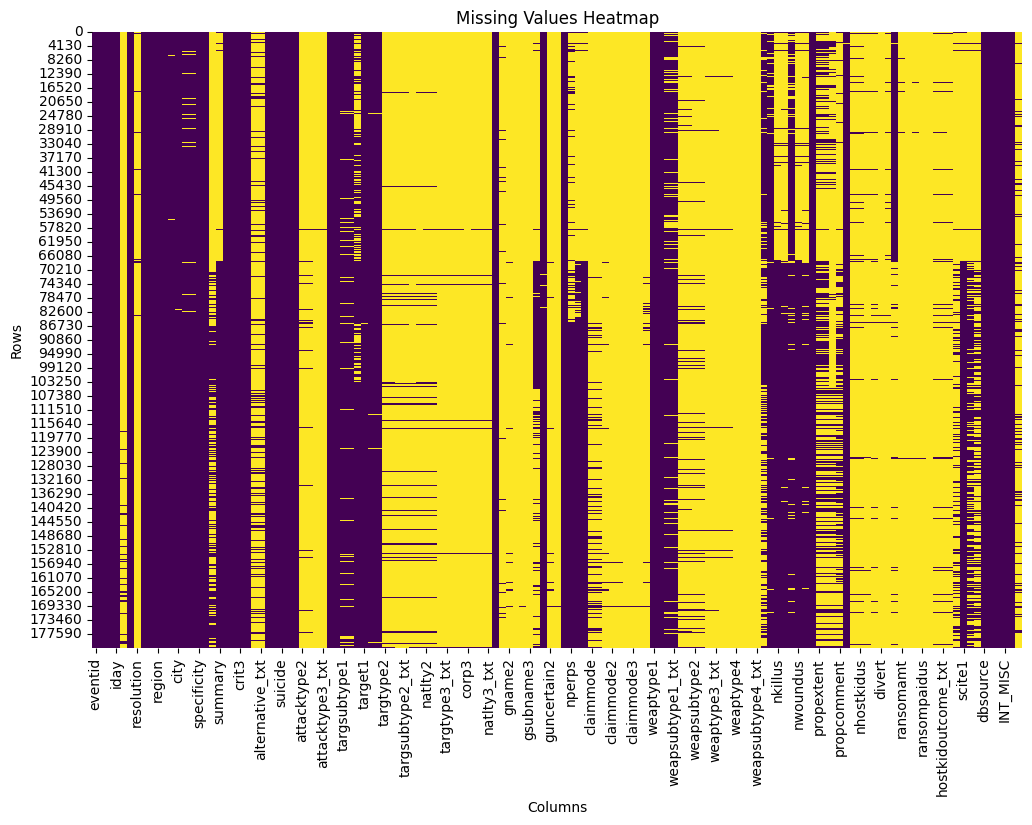

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate a heatmap of missing values
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [32]:
#To assess the extent of missing values in a DataFrame and prioritize columns for further data cleaning or imputation processes.
# Calculate summary statistics
missing_stats = df.isnull().sum()
missing_percentage = (missing_stats / len(df)) * 100

# Combine statistics into a DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_stats,
    'Percentage': missing_percentage
})

# Sort summary by percentage of missing values
missing_summary = missing_summary.sort_values(by='Percentage', ascending=False)

print("Summary Statistics for Missing Values:")
print(missing_summary)












Summary Statistics for Missing Values:
                  Missing Values  Percentage
gsubname3                 181671   99.988992
weapsubtype4_txt          181621   99.961473
weapsubtype4              181621   99.961473
weaptype4                 181618   99.959822
weaptype4_txt             181618   99.959822
...                          ...         ...
suicide                        0    0.000000
success                        0    0.000000
crit3                          0    0.000000
property                       0    0.000000
eventid                        0    0.000000

[135 rows x 2 columns]


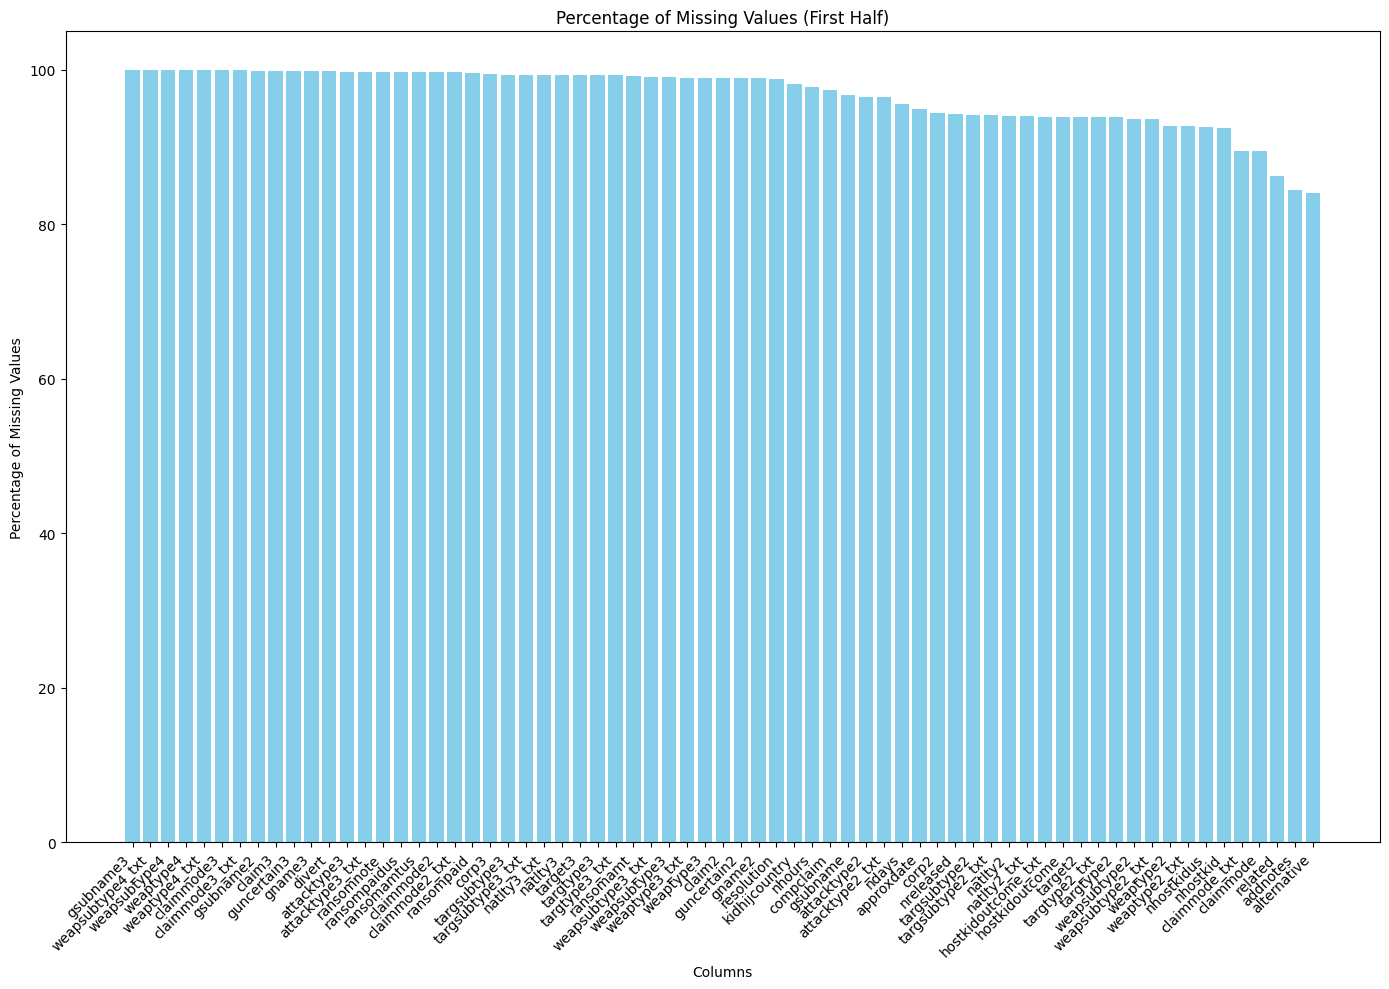

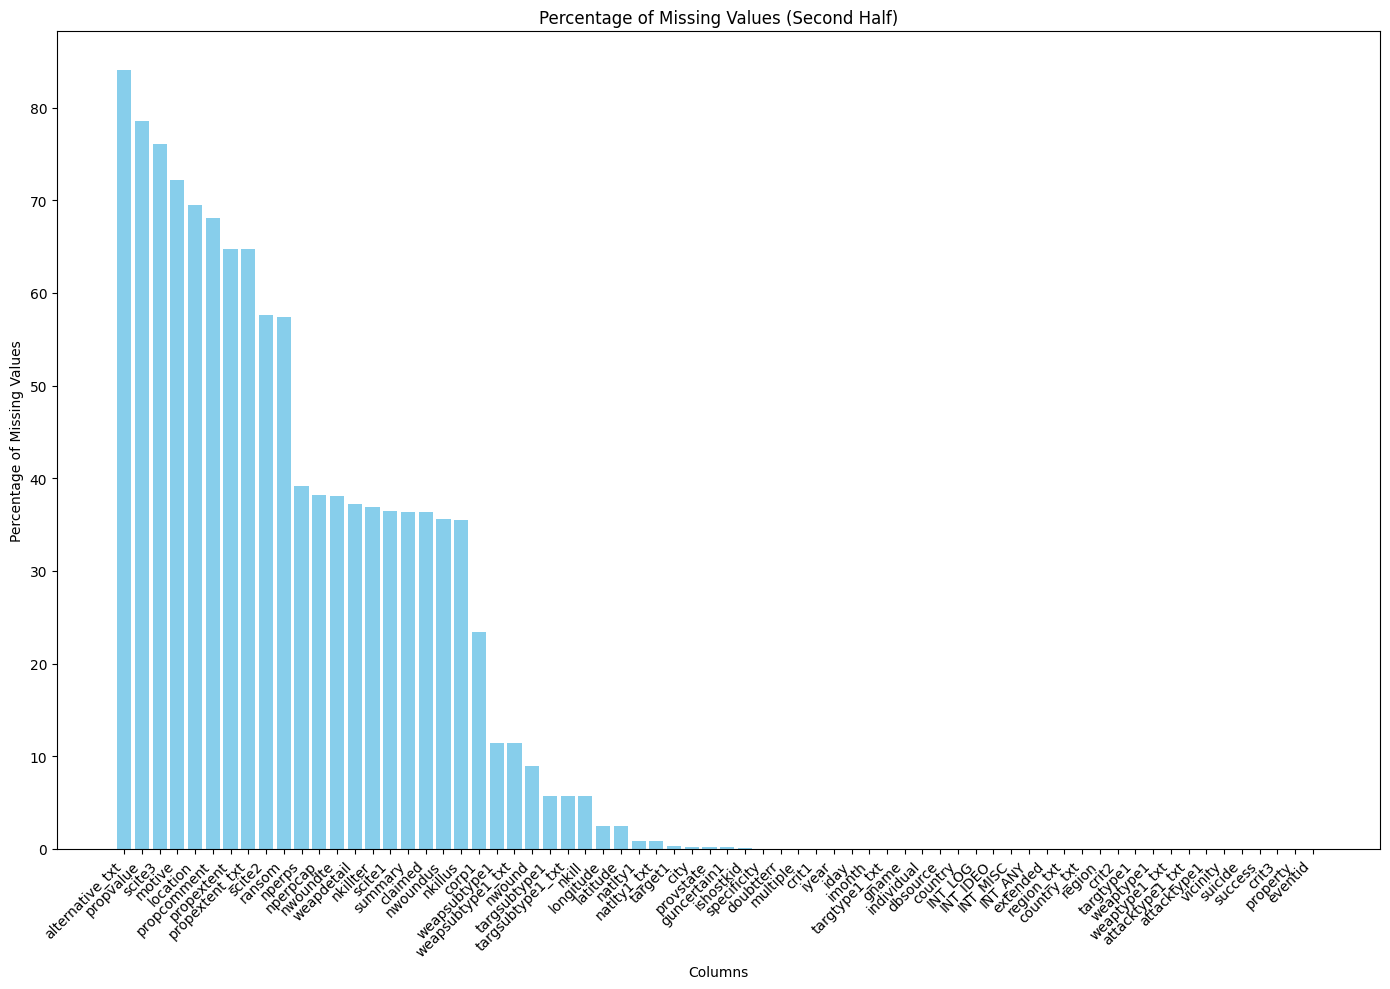

In [33]:
# Calculate the number of columns
num_columns = len(missing_summary)

# Split the DataFrame into two halves
first_half = missing_summary.iloc[:num_columns//2]
second_half = missing_summary.iloc[num_columns//2:]

# Plot the first half
plt.figure(figsize=(14, 10))
plt.bar(first_half.index, first_half['Percentage'], color='skyblue')
plt.title('Percentage of Missing Values (First Half)')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the second half
plt.figure(figsize=(14, 10))
plt.bar(second_half.index, second_half['Percentage'], color='skyblue')
plt.title('Percentage of Missing Values (Second Half)')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## ***2. Understanding Your Variables***

In [34]:
# Dataset Columns
df.columns



Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [35]:
# Dataset Describe
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.


# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()


Unique values for column 'eventid':
[1.97000e+11 1.97001e+11 1.97002e+11 1.97003e+11 1.97004e+11 1.97005e+11
 1.97006e+11 1.97007e+11 1.97008e+11 1.97009e+11 1.97010e+11 1.97011e+11
 1.97012e+11 1.97101e+11 1.97102e+11 1.97103e+11 1.97104e+11 1.97105e+11
 1.97106e+11 1.97107e+11 1.97108e+11 1.97109e+11 1.97110e+11 1.97111e+11
 1.97112e+11 1.97200e+11 1.97201e+11 1.97202e+11 1.97203e+11 1.97204e+11
 1.97205e+11 1.97206e+11 1.97207e+11 1.97208e+11 1.97209e+11 1.97210e+11
 1.97211e+11 1.97212e+11 1.97300e+11 1.97301e+11 1.97302e+11 1.97303e+11
 1.97304e+11 1.97305e+11 1.97306e+11 1.97307e+11 1.97308e+11 1.97309e+11
 1.97310e+11 1.97311e+11 1.97312e+11 1.97400e+11 1.97401e+11 1.97402e+11
 1.97403e+11 1.97404e+11 1.97405e+11 1.97406e+11 1.97407e+11 1.97408e+11
 1.97409e+11 1.97410e+11 1.97411e+11 1.97412e+11 1.97500e+11 1.97501e+11
 1.97502e+11 1.97503e+11 1.97504e+11 1.97505e+11 1.97506e+11 1.97507e+11
 1.97508e+11 1.97509e+11 1.97510e+11 1.97511e+11 1.97512e+11 1.97600e+11
 1.97601e+11 1.

## 3. ***Data Wrangling***

In [37]:
#eliminated columns due to too many missing values
# Specify the columns to be selected
selected_columns = ["iyear", "imonth", "crit1", "crit2", "crit3", "country_txt", "region_txt", "city",
                    "attacktype1_txt", "success", "weaptype1_txt", "targtype1_txt", "targsubtype1_txt",
                    "gname", "nperps", "nperpcap", "nkill", "nkillter", "nwound", "nwoundte",
                    "INT_LOG", "INT_IDEO",'motive']

# Select the specified columns from the DataFrame
df = df[selected_columns].copy()

# Display the selected columns
print(df)


        iyear  imonth  crit1  crit2  crit3         country_txt  \
0        1970       7      1      1      1  Dominican Republic   
1        1970       0      1      1      1              Mexico   
2        1970       1      1      1      1         Philippines   
3        1970       1      1      1      1              Greece   
4        1970       1      1      1      1               Japan   
...       ...     ...    ...    ...    ...                 ...   
181686   2017      12      1      1      0             Somalia   
181687   2017      12      1      1      0               Syria   
181688   2017      12      1      1      1         Philippines   
181689   2017      12      1      1      1               India   
181690   2017      12      1      1      1         Philippines   

                         region_txt           city  \
0       Central America & Caribbean  Santo Domingo   
1                     North America    Mexico city   
2                    Southeast Asia        Un

In [38]:
df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'crit1': 'criteria1', 'crit2': 'criteria2', 'crit3': 'criteria3',
                   'country_txt': 'Country', 'region_txt': 'Region', 'city': 'City', 'attacktype1_txt': 'Type of attack',
                   'success': 'Success', 'weaptype1_txt': 'weapon type', 'targtype1_txt': 'Type of target',
                   'targsubtype1_txt': 'subtype of target', 'gname': 'Group name', 'nperps': 'no. of perpetrators',
                   'nperpcap': 'no. of perpetrators captured', 'nkill': 'no. of people killed', 'nkillter': 'no. of terrorists killed',
                   'nwound': 'no of wounded', 'nwoundte': 'no. of wounded terrorists', 'INT_LOG': 'International-Logistical',
                   'INT_IDEO': 'International-Ideological','motive':'Motive'}, inplace=True)


In [39]:
#start cleaning by removing duplicates
df.drop_duplicates(inplace = True)
df = df.reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165913 entries, 0 to 165912
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year                          165913 non-null  int64  
 1   Month                         165913 non-null  int64  
 2   criteria1                     165913 non-null  int64  
 3   criteria2                     165913 non-null  int64  
 4   criteria3                     165913 non-null  int64  
 5   Country                       165913 non-null  object 
 6   Region                        165913 non-null  object 
 7   City                          165512 non-null  object 
 8   Type of attack                165913 non-null  object 
 9   Success                       165913 non-null  int64  
 10  weapon type                   165913 non-null  object 
 11  Type of target                165913 non-null  object 
 12  subtype of target             157090 non-nul

In [40]:
print(f'There are a total of {df.shape[0]} Rows and {df.shape[1]} Columns In the Dataframe')


There are a total of 165913 Rows and 23 Columns In the Dataframe


In [41]:
df.dtypes

Year                              int64
Month                             int64
criteria1                         int64
criteria2                         int64
criteria3                         int64
Country                          object
Region                           object
City                             object
Type of attack                   object
Success                           int64
weapon type                      object
Type of target                   object
subtype of target                object
Group name                       object
no. of perpetrators             float64
no. of perpetrators captured    float64
no. of people killed            float64
no. of terrorists killed        float64
no of wounded                   float64
no. of wounded terrorists       float64
International-Logistical          int64
International-Ideological         int64
Motive                           object
dtype: object

In [42]:
df.isnull().sum()

Year                                 0
Month                                0
criteria1                            0
criteria2                            0
criteria3                            0
Country                              0
Region                               0
City                               401
Type of attack                       0
Success                              0
weapon type                          0
Type of target                       0
subtype of target                 8823
Group name                           0
no. of perpetrators              61802
no. of perpetrators captured     60275
no. of people killed              8991
no. of terrorists killed         57843
no of wounded                    14592
no. of wounded terrorists        59961
International-Logistical             0
International-Ideological            0
Motive                          117541
dtype: int64

Large proportion of the DataFrame contains null values, dropping rows with null values could result in the removal of a substantial portion or even all of the rows. I selected specific columns of interest from the dataset for further analysis. While preparing the dataset,I chose to retain the null values in the dataset without imputing them, as this aligns with the objectives of the analysis and avoids introducing potential biases associated with imputation techniques.

#**Exploring Data Through Visualization, Narrative Development, and Chart Experimentation: Uncover the Connections Among Variables**






---



####When we hear about terrorist attacks, there is often a prevailing perception that regions in the Middle East bear the brunt of such violence.is it true?






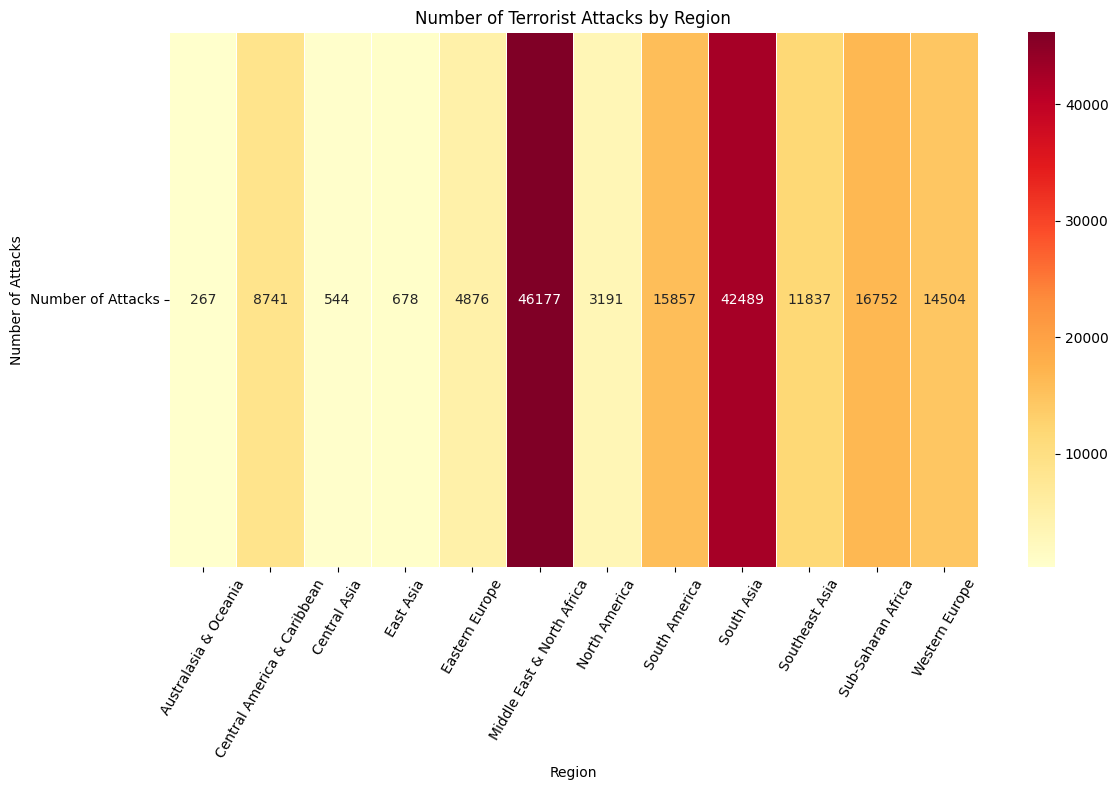

In [43]:
region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Number of Attacks']

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(region_counts, values='Number of Attacks', index=None, columns='Region')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g', linewidths=0.5)
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


####The heatmap indicates that the Middle East and North Africa experience the highest frequency of terrorist attacks, followed by South Asia. Conversely, Australasia, which includes countries like Australia and New Zealand, along with Central Asia and East Asia, with nations such as Azerbaijan and China, record relatively fewer attacks. This prompts us to explore whether a country's economy, political stability, and type of government influence these patterns. Let's delve deeper into this aspect.







<ipython-input-44-d73b79d98a14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_attacks.values, y=country_attacks.index, palette='muted')


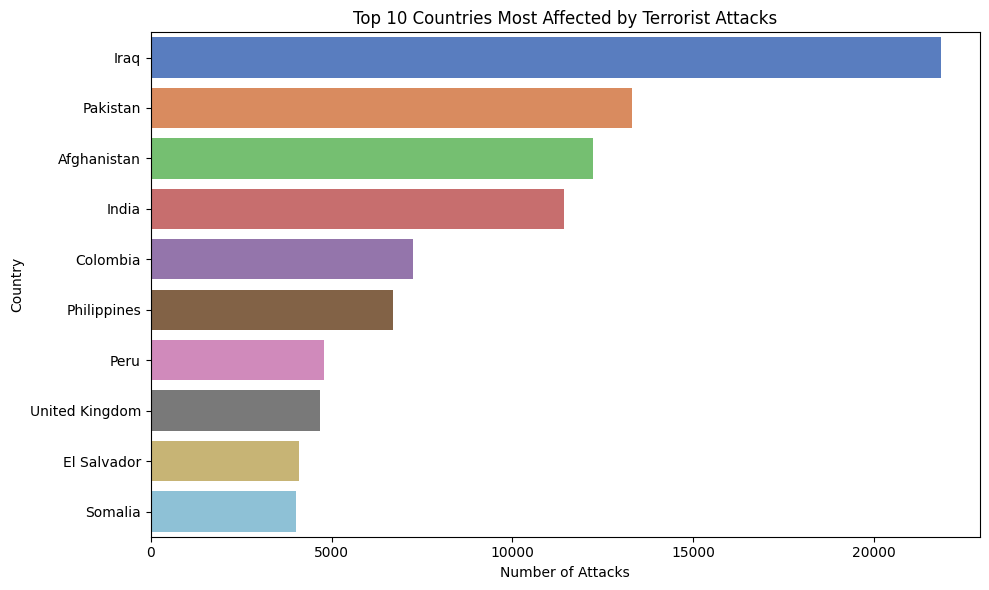

In [44]:
# Group the data by country and count the number of attacks in each country
country_attacks = df['Country'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_attacks.values, y=country_attacks.index, palette='muted')
plt.title('Top 10 Countries Most Affected by Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


South Asia exhibits a notable presence in the top 10 countries most affected by terrorist attacks, with three countries from the region included: Pakistan, Afghanistan, and India. This region has experienced significant levels of terrorist activity due to various factors, including geopolitical tensions, internal conflicts, and extremist ideologies. In addition to the aforementioned countries, Bangladesh, Sri Lanka, and Nepal have also grappled with terrorism, underscoring the complex security challenges faced by South Asian nations.







###which country in each region records the most attacks and why so?

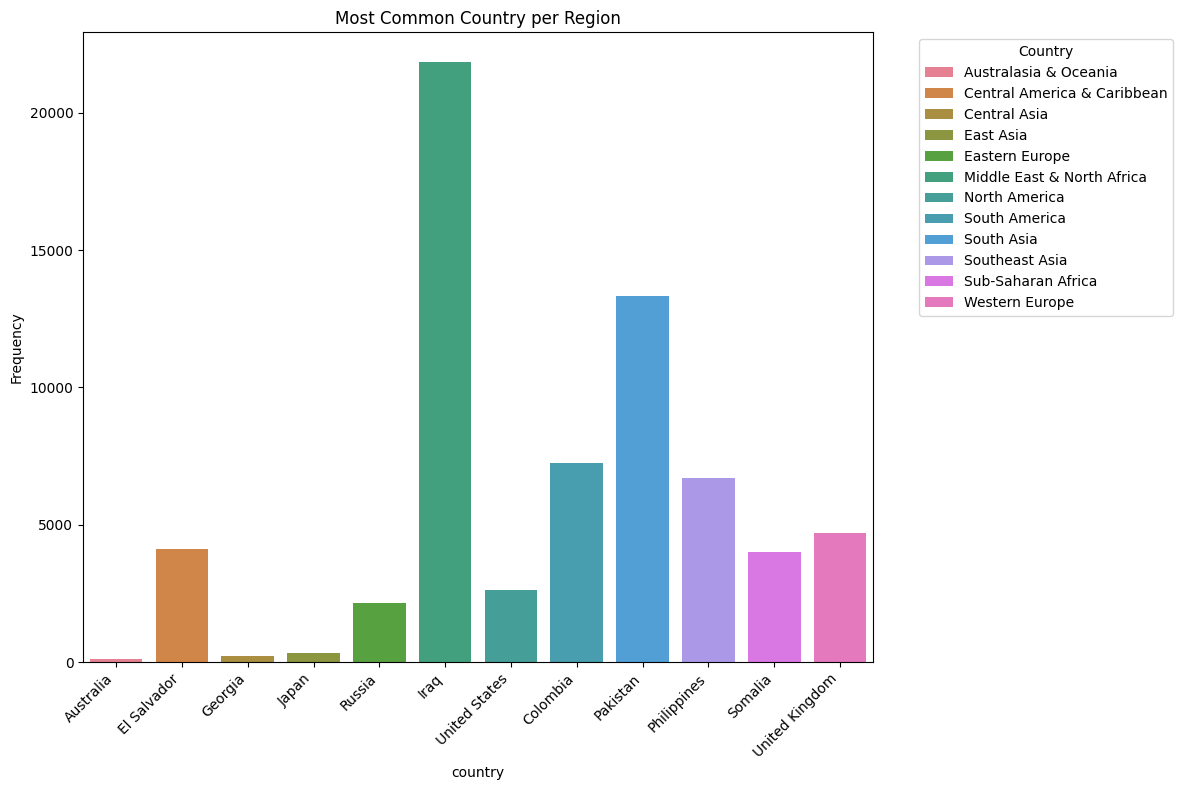

In [45]:
# Group the data by region and country, then count the occurrences
region_country_counts = df.groupby(['Region', 'Country']).size().reset_index(name='count')

# Find the country with the highest count in each region
idx = region_country_counts.groupby('Region')['count'].transform(max) == region_country_counts['count']
most_common_country_per_region = region_country_counts[idx]

# Plotting the most common country per region
plt.figure(figsize=(12, 8))
sns.barplot(data=most_common_country_per_region, x='Country', y='count', hue='Region', dodge=False)
plt.title('Most Common Country per Region')
plt.xlabel('country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


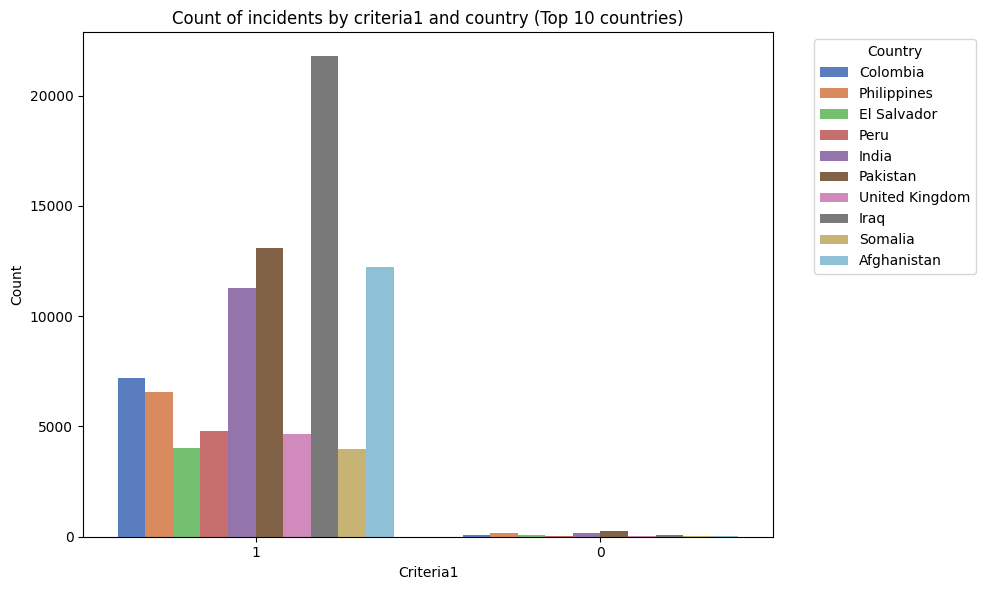

In [46]:
# Calculate the frequency of incidents for each country
country_counts = df['Country'].value_counts().head(10).index

# Filter the DataFrame to include only incidents from the top 10 countries
df_top_countries = df[df['Country'].isin(country_counts)]

# Create a count plot for the top 10 countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_countries, x='criteria1', hue='Country', order=df_top_countries['criteria1'].value_counts().index,palette='muted')
plt.title('Count of incidents by criteria1 and country (Top 10 countries)')
plt.xlabel('Criteria1')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL
The violent act must be aimed at attaining a political, economic, religious, or social goal.
This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure
profit motive or from an idiosyncratic personal motive unconnected with broader
societal change.

As indicated by the chart, Iraq emerges as the most heavily affected country, particularly in the Middle East region. Similarly, Pakistan and India stands out as a notable hotspot for terrorist activity in South Asia, while Colombia exhibits significant incidents in South America. Additionally, delving deeper into the dataset reveals nuanced patterns, such as Afghanistan's enduring struggles in South Asia and somalia's prominence in sub-Saharan Africa. These insights underscore the varied geographical distribution of terrorist incidents and highlight the need for context-specific analysis to address underlying factors effectively.







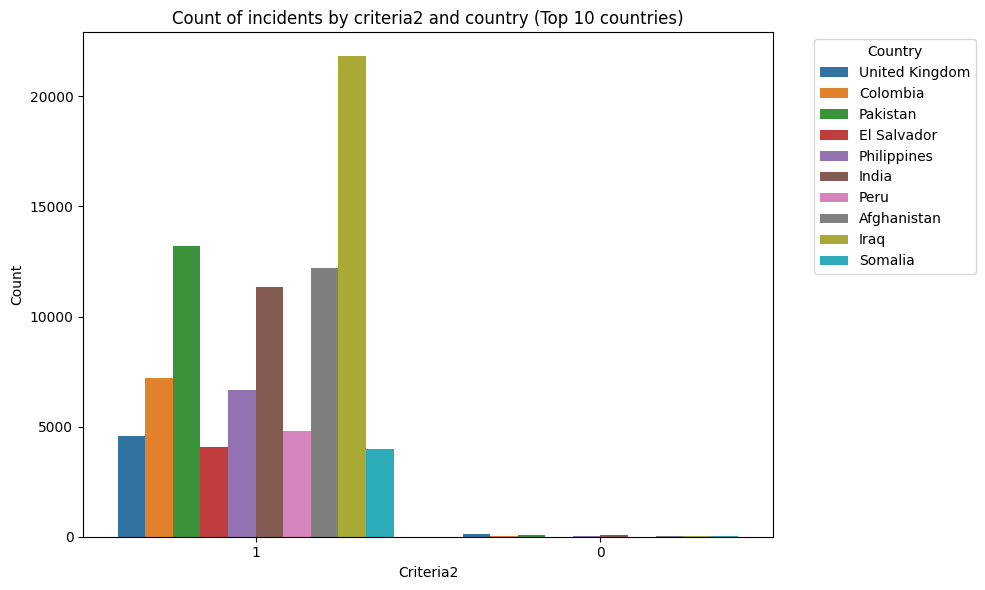

In [47]:
# Calculate the frequency of incidents for each country
country_counts = df['Country'].value_counts().head(10).index

# Filter the DataFrame to include only incidents from the top 10 countries
df_top_countries = df[df['Country'].isin(country_counts)]

# Create a count plot for the top 10 countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_countries, x='criteria2', hue='Country', order=df_top_countries['criteria1'].value_counts().index)
plt.title('Count of incidents by criteria2 and country (Top 10 countries)')
plt.xlabel('Criteria2')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)

To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims.

Iraq's prominence in both criteria can be attributed to several factors such as
conflict and Instability. Iraq has experienced significant conflict and instability, particularly following the 2003 invasion and subsequent insurgency. This environment of turmoil has provided fertile ground for terrorist organizations to operate and carry out attacks.

The combination of internal conflict, geopolitical dynamics, sectarian tensions, and the presence of extremist groups such as ISIS contributes to Iraq's prominence in both criteria related to terrorist attacks. Addressing these underlying issues requires comprehensive strategies encompassing security measures, political reconciliation, and socioeconomic development efforts.






####When considering Western Europe, the immediate association may not be with terrorist attack victims for several reasons like relatively stable environment,strong security and low frequency of attacks.However, despite these perceptions, Western Europe is not immune to terrorism, and the region has experienced notable attacks in recent decades.Does United Kingdom record the most number of terrorist attacks?if so why?



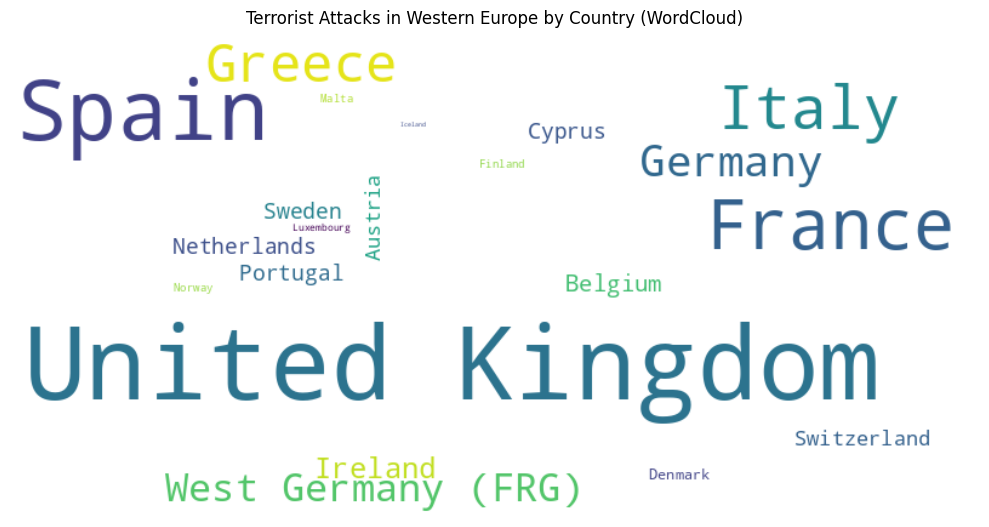

In [48]:
from wordcloud import WordCloud

# Filter the DataFrame to include only data for Western Europe
western_europe_attacks = df[df['Region'] == 'Western Europe']

# Group the data by country and count the number of attacks in each country
western_europe_attacks_by_country = western_europe_attacks['Country'].value_counts().to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(western_europe_attacks_by_country)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Terrorist Attacks in Western Europe by Country (WordCloud)')
plt.axis('off')
plt.tight_layout()
plt.show()


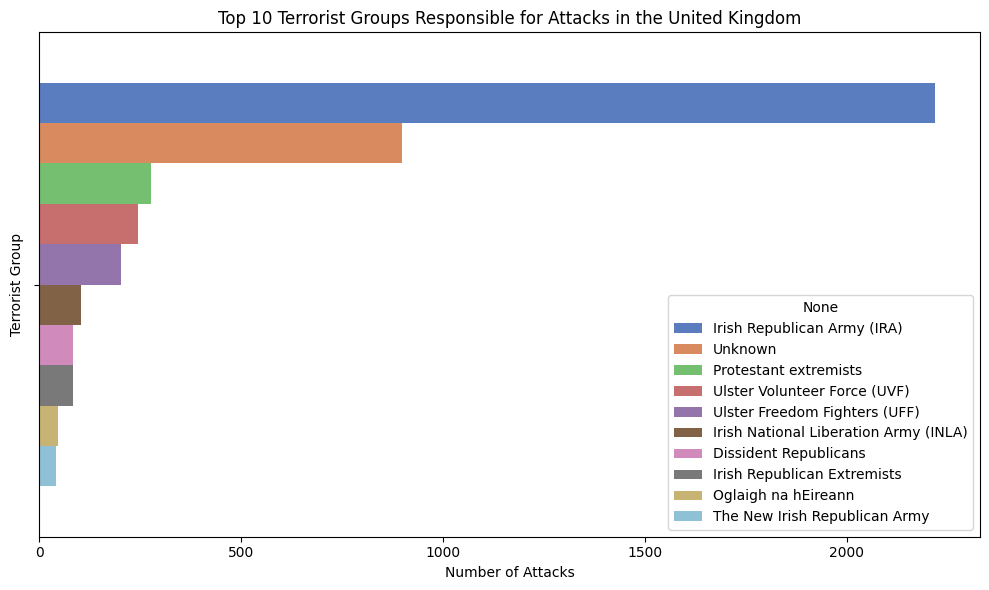

In [50]:
# Filter the DataFrame to include only data for the United Kingdom
uk_attacks = df[df['Country'] == 'United Kingdom']

# Group the data by group name and count the number of attacks by each group
group_attacks = uk_attacks['Group name'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=group_attacks.values, hue=group_attacks.index, palette='muted')
plt.title('Top 10 Terrorist Groups Responsible for Attacks in the United Kingdom')
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Group')
plt.tight_layout()
plt.show()


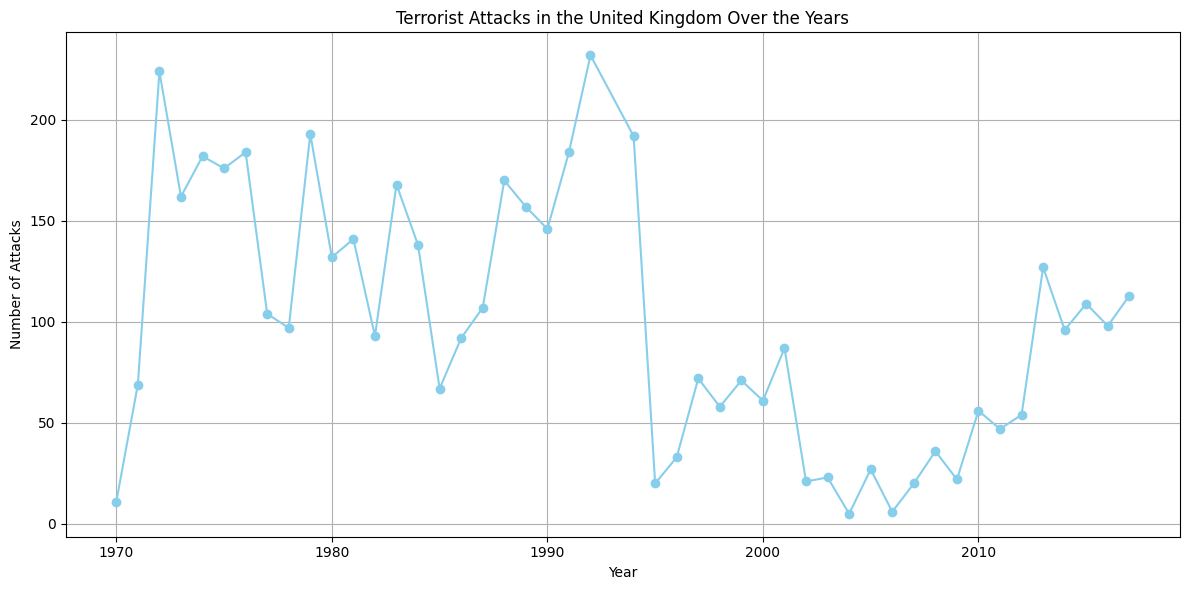

In [51]:
# Filter the DataFrame to include only data for the United Kingdom
uk_attacks = df[df['Country'] == 'United Kingdom']

# Group the data by year and count the number of attacks each year
uk_attacks_by_year = uk_attacks.groupby('Year').size()

# Create a line plot
plt.figure(figsize=(12, 6))
uk_attacks_by_year.plot(marker='o', color='skyblue', linestyle='-')
plt.title('Terrorist Attacks in the United Kingdom Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()


The United Kingdom does indeed stand out with the highest number of terrorist attacks, particularly notable before the year 2000. Upon closer examination of the second chart, we observe that the Irish Republican Army (IRA) is identified as the primary perpetrator in the majority of these incidents.
The IRA, a paramilitary organization seeking to end British rule in Northern Ireland and achieve a united Ireland, carried out numerous attacks on military, government, and civilian targets during this period. These attacks, often involving bombings in major cities like London and Manchester, contributed to the overall spike in terrorist incidents.







###What constitutes the most prevalent method of attack in terrorism,are certain types of terrorist attacks more prevalent in specific regions or countries?"







<ipython-input-52-eb0c6c367d0b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_types_counts.values, y=attack_types_counts.index, palette='muted')


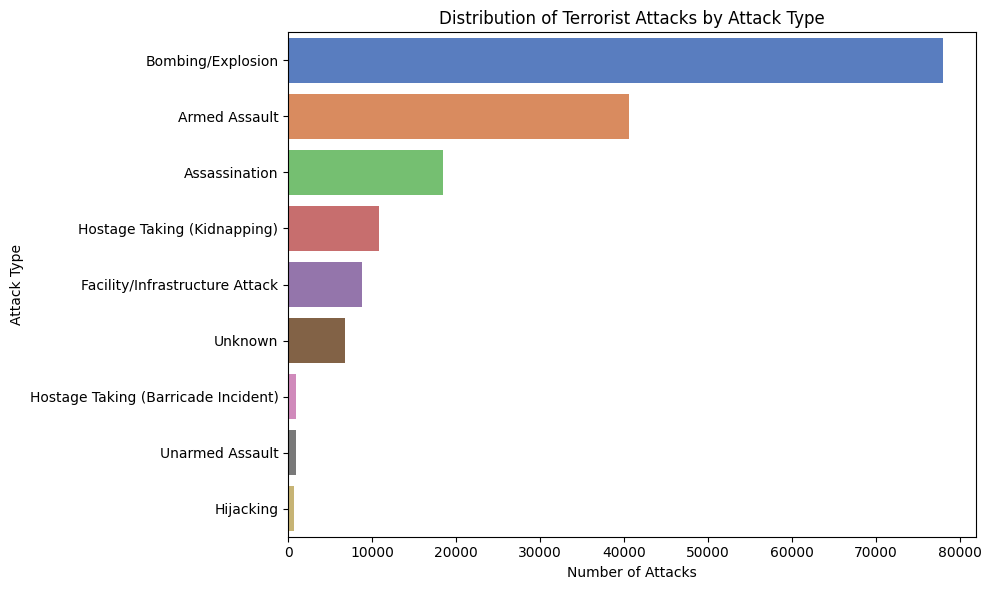

In [52]:
# Group the data by attack type and count the number of attacks for each type
attack_types_counts = df['Type of attack'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_types_counts.values, y=attack_types_counts.index, palette='muted')
plt.title('Distribution of Terrorist Attacks by Attack Type')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


<ipython-input-53-748c6fb2cf26>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from being cut off


<Figure size 1400x800 with 0 Axes>

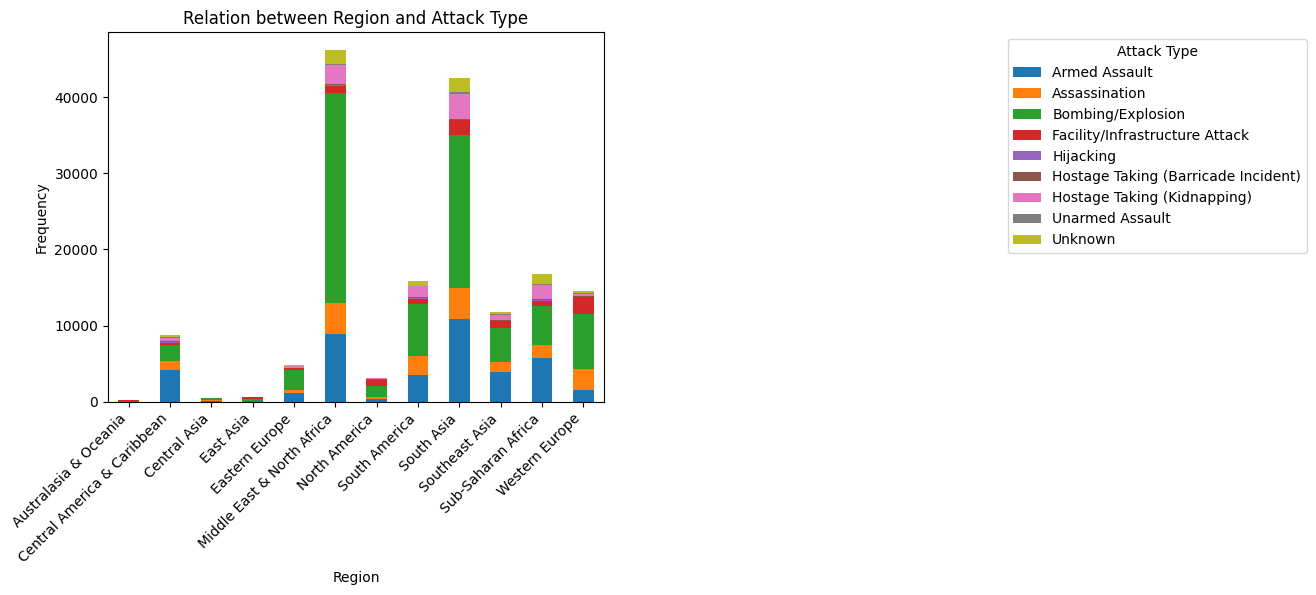

In [53]:
# Create a cross-tabulation between region_txt and attacktype1_txt
cross_tab = pd.crosstab(df['Region'], df['Type of attack'])

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Relation between Region and Attack Type')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Attack Type', bbox_to_anchor=(1.8,1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


The Middle East and South Asia regions are often more prone to bombings and explosions during terrorist attacks.
Both regions have a history of geopolitical instability, ongoing conflicts, and political unrest. These conditions create fertile ground for terrorist groups to operate and carry out attacks, often targeting civilians and infrastructure.
Many countries in the Middle East and South Asia have diverse populations with deep-rooted ethnic, religious, and sectarian divisions. Terrorist groups often exploit these divisions to incite violence and carry out attacks against perceived enemies or rival groups.

External factors, such as foreign interventions, regional rivalries, and proxy conflicts, also play a significant role in exacerbating instability and insecurity in the Middle East and South Asia, further contributing to the prevalence of bombings and explosions during terrorist attacks.

####"To what extent does the motive behind terrorist attacks influence the selection of specific types of attacks, such as bombings and explosions? How do ideological, political, religious, or strategic objectives shape the choice of targets and tactics employed by terrorist groups in these regions?"







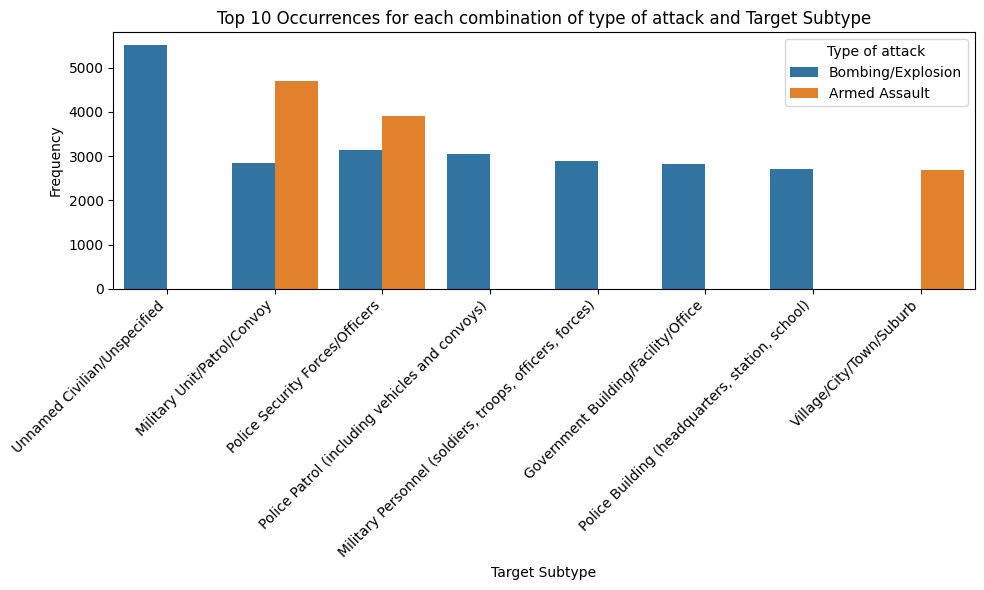

In [54]:
# Selecting the columns of interest
columns_of_interest = ['Type of attack', 'subtype of target']

# Calculating the top N occurrences for each combination of type of attack and subtype of target
N = 10  # Change N to the desired number of top occurrences
top_N = df.groupby(['Type of attack', 'subtype of target']).size().nlargest(N)

# Reset index to make the multi-index columns into regular columns
top_N = top_N.reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=top_N, x='subtype of target', y=0, hue='Type of attack', dodge=True)
plt.title(f'Top {N} Occurrences for each combination of type of attack and Target Subtype')
plt.xlabel('Target Subtype')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


Given Criterion 2's emphasis on intentions to coerce, intimidate, or publicize to larger audiences, it's conceivable that such motives contribute to the prevalence of civilian casualties in terrorist attacks. Terrorist groups often aim to instill fear and send messages to broader populations through their actions. Targeting civilians not only inflicts direct harm but also serves as a means to achieve these broader objectives. By striking civilian targets, perpetrators seek to maximize the impact of their actions, garnering attention, spreading terror, and exerting pressure on governments or societies.



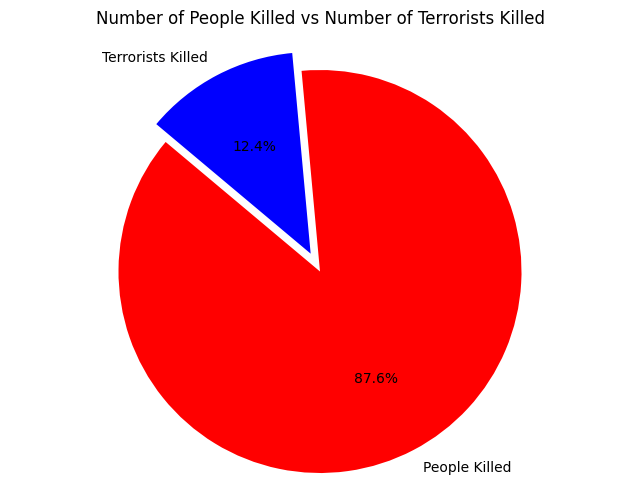

In [55]:
# Summing up the total number of people killed and terrorists killed
total_people_killed = df['no. of people killed'].sum()
total_terrorists_killed = df['no. of terrorists killed'].sum()

# Data for the pie chart
labels = ['People Killed', 'Terrorists Killed']
sizes = [total_people_killed, total_terrorists_killed]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode the first slice (People Killed)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of People Killed vs Number of Terrorists Killed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


As civilians falls victim to these attacks the most it should be of no wonder that the number of people killed would be much higher than the number of terrorists killed.

##Which terrorist group is accountable for the majority of attacks,and are terrorist attacks perpetrated by individuals aligned with a group's ideology or carried out independently?








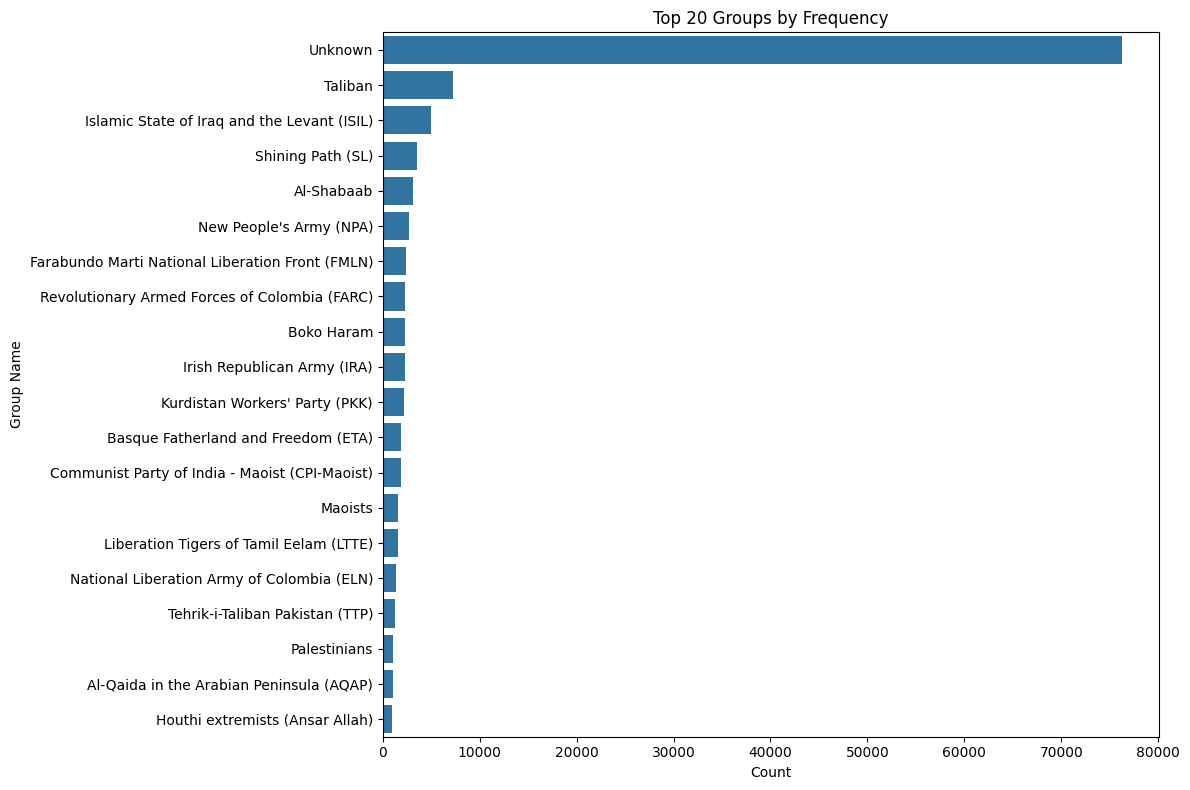

In [56]:
# Calculate the frequency of each group name
group_counts = df['Group name'].value_counts().head(20)

# Create a count plot for the top 20 groups
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Group name', order=group_counts.index)
plt.title('Top 20 Groups by Frequency')
plt.xlabel('Count')
plt.ylabel('Group Name')
plt.tight_layout()
plt.show()


The prevalence of 'unknown' perpetrators in the dataset may stem from the operational secrecy of some terrorist groups, where members deliberately conceal their identities to evade detection or legal consequences. This clandestine approach poses challenges for authorities in attributing specific attacks to known groups or individuals.






Lone individuals or small cells may carry out terrorist acts without affiliating with established groups. These perpetrators often act independently, making it difficult to identify them or establish their motives and affiliations.Sometimes, multiple groups or individuals claim responsibility for the same attack, leading to confusion regarding the true perpetrators. False claims may be made for propaganda purposes or to divert attention from the actual perpetrators.

**The Taliban** is an Islamist militant group that emerged in Afghanistan in the early 1990s as the after math of soviet-afgan war. The Taliban's ideology combines elements of Pashtun tribalism, Islamic fundamentalism, and anti-Western sentiment. Despite ongoing peace talks and attempts at reconciliation, the group remains a potent force in Afghanistan, with control over significant territory and continuing influence over large segments of the population.

**The Islamic State of Iraq and the Levant (ISIL)**, also known as the Islamic State of Iraq and Syria (ISIS), is a militant extremist group that emerged in the early 2000s. The group traces its origins to the aftermath of the U.S.-led invasion of Iraq in 2003 and the subsequent insurgency against coalition forces. While ISIL has lost most of its territorial holdings, it continues to pose a threat through its dispersed networks, sleeper cells, and online presence.

**The Shining Path**, officially known as the Communist Party of Peru - Shining Path (Partido Comunista del Perú - Sendero Luminoso) emerged during a period of social and economic upheaval in Peru, marked by widespread poverty, inequality, and government corruption.Although the Shining Path's capacity for large-scale attacks has been greatly diminished, remnants of the organization continue to operate in remote and marginalized areas of Peru, engaging in illicit activities.










###Do attacks by unknown individuals or groups tend to occur in concentrated areas, or are they distributed proportionally across the globe?






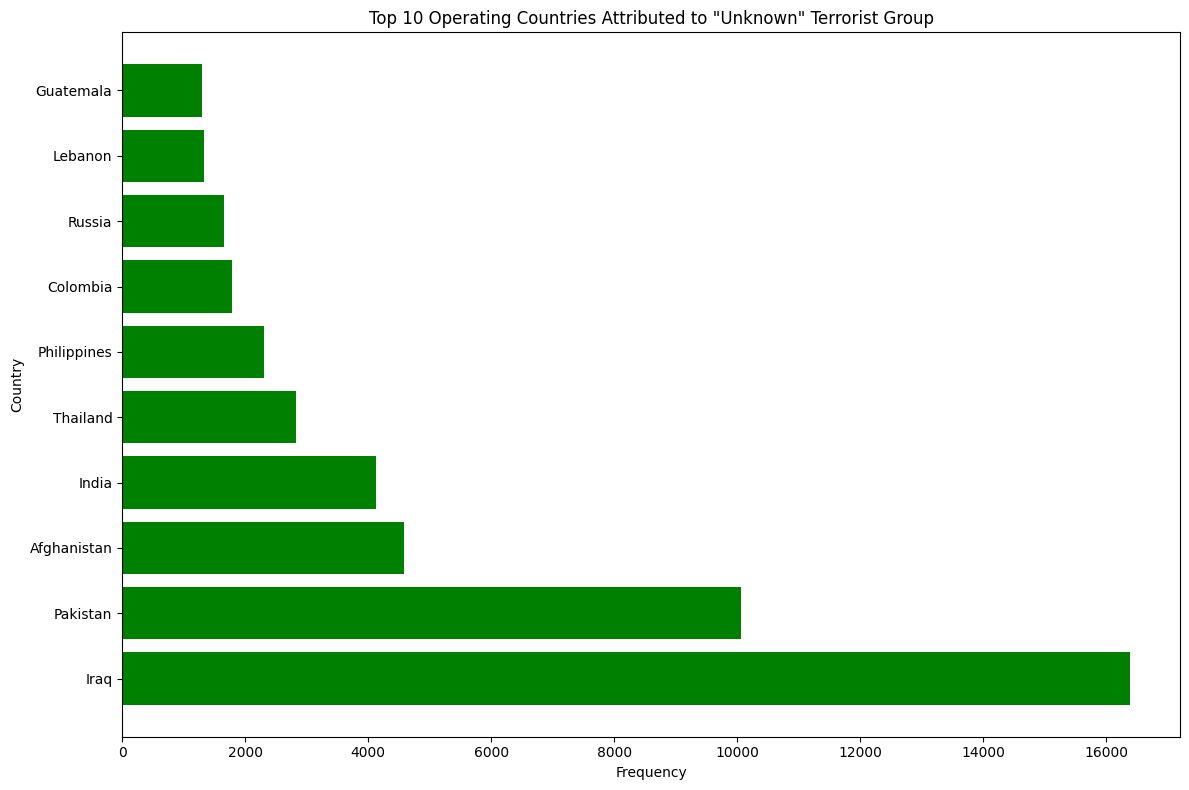

In [57]:
# Selecting the columns of interest
columns_of_interest = ['Group name', 'Country']

# Filtering the DataFrame for entries where the group name is "unknown"
df_unknown = df[df['Group name'] == 'Unknown']

# Calculating the top 10 occurrences for each combination of group name (in this case, "unknown") and country
top_10 = df_unknown.groupby(['Group name', 'Country']).size().nlargest(10)

# Reset index to make the multi-index columns into regular columns
top_10 = top_10.reset_index()

# Plotting the results
plt.figure(figsize=(12, 8))
plt.barh(top_10['Country'], top_10[0], color='green')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Top 10 Operating Countries Attributed to "Unknown" Terrorist Group')
plt.tight_layout()
plt.show()


It seems that unknown perpetratores are distributed all over the world  although the distribution does not seem to be proportionate.this begs the question that does the number of attacks by unknown groups or individuals peaks at the time of ongoing conflicts?







###What is the impact on cities, and are there any significant hotspots of terrorist activity within urban areas?







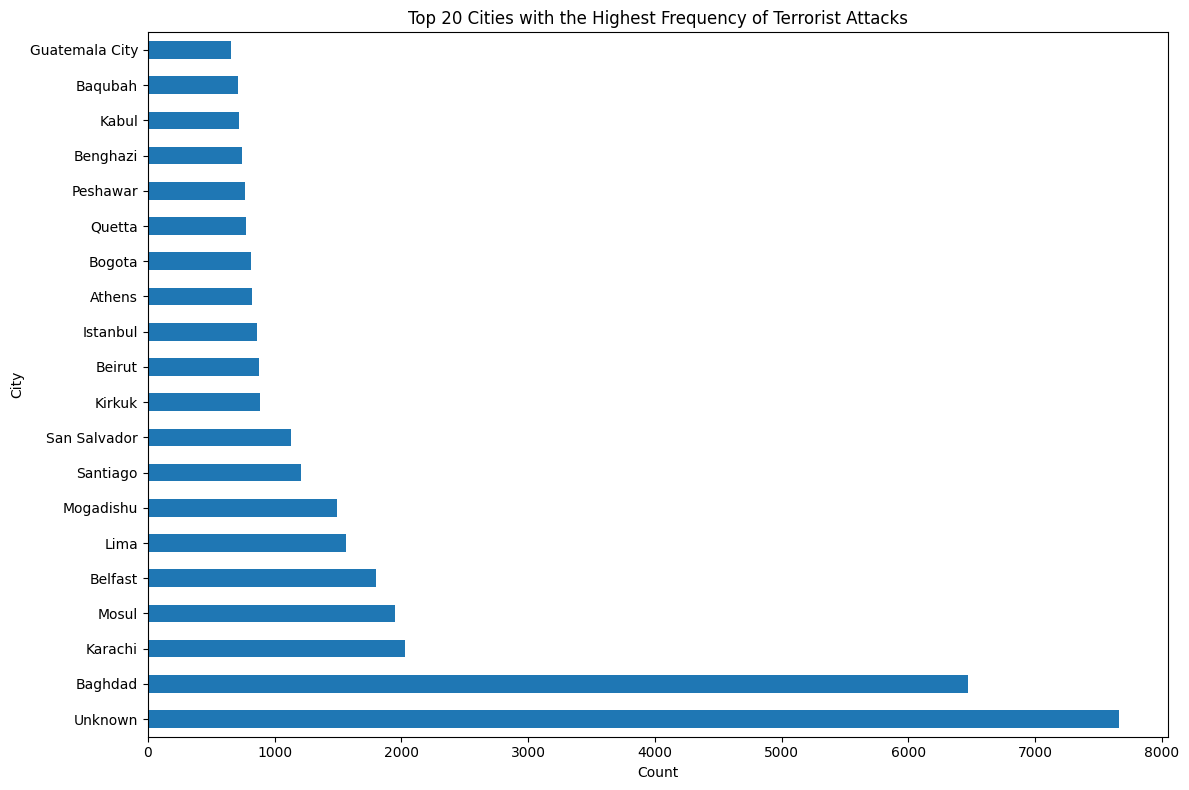

In [58]:
# Create a horizontal bar plot for the 'city' column
plt.figure(figsize=(12, 8))
df['City'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Cities with the Highest Frequency of Terrorist Attacks')
plt.xlabel('Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()


 Baghdad followed by Karachi appear to have recorded the highest number of cases, yet it's notable that the number of incidents in cities categorized as "unknown" surpasses them.
It could be incomplete Reporting, Not all terrorist incidents are reported or documented comprehensively in the media or official records. Some attacks may receive limited coverage, particularly in remote or *conflict-affected areas*, resulting in incomplete information about the location.lets look into which country has the most 'unknown' recorded.




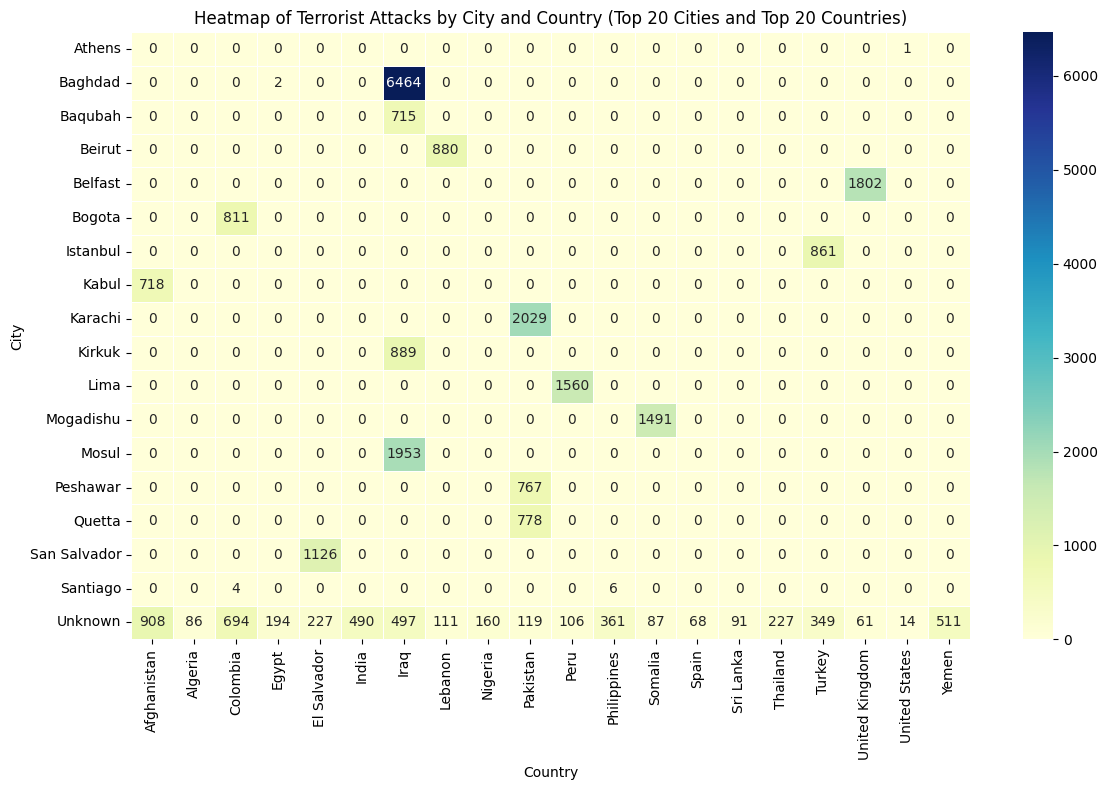

In [59]:
# Calculate the top 20 cities and top 20 countries with the highest frequency of attacks
top_20_cities = df['City'].value_counts().head(20).index
top_20_countries = df['Country'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 cities and top 20 countries
filtered_df = df[df['City'].isin(top_20_cities) & df['Country'].isin(top_20_countries)]

# Create a pivot table with city and country as indices and count of attacks as values
pivot_table = filtered_df.groupby(['City', 'Country']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Heatmap of Terrorist Attacks by City and Country (Top 20 Cities and Top 20 Countries)')
plt.xlabel('Country')
plt.ylabel('City')
plt.tight_layout()
plt.show()


Afghanistan appears to have the highest number of cities categorized as "unknown," followed by Colombia and Yemen. Given that these countries have experienced prolonged conflicts, let's revisit our previous question: Could the lack of proper reporting on the location or perpetrators of attacks be attributed to ongoing conflicts during the time of the attack?







<ipython-input-60-4cf72420bb0d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=afghanistan_df, x='Year', palette='muted')


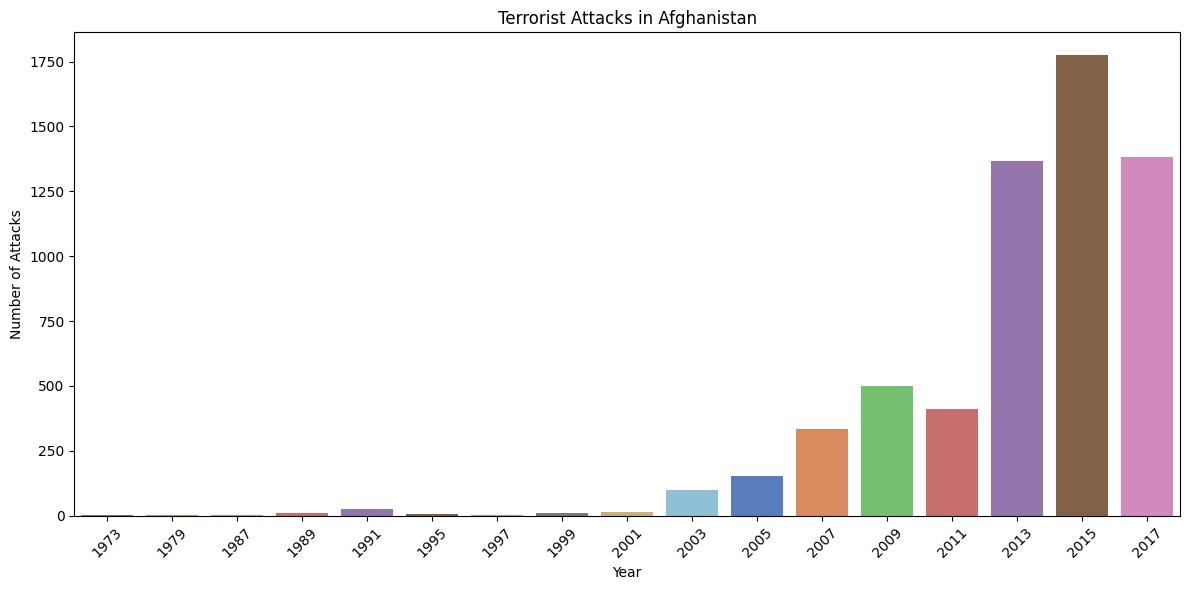

In [60]:
# Filter the DataFrame to include only incidents in Afghanistan and year
afghanistan_df = df[(df['Country'] == 'Afghanistan') & (df['Year'] )]

# Create a count plot to show the frequency of attacks over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=afghanistan_df, x='Year', palette='muted')
plt.title('Terrorist Attacks in Afghanistan')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


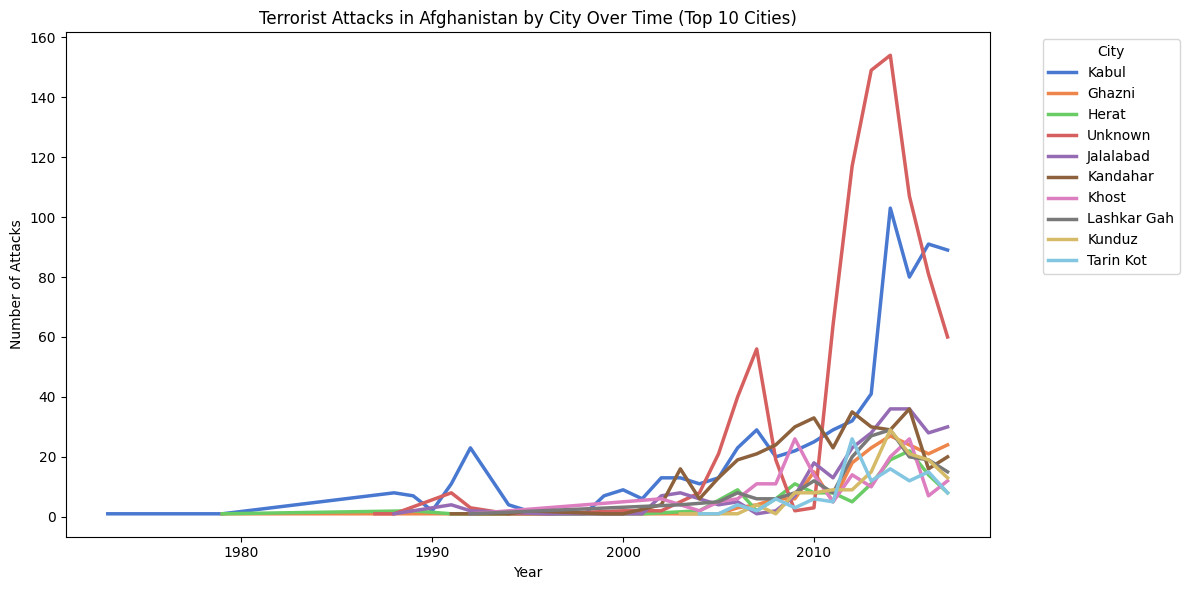

In [61]:
# Filter the DataFrame to include only incidents in Afghanistan
afghanistan_df = df[df['Country'] == 'Afghanistan']


# Calculate the top 10 cities with the highest frequency of attacks
top_10_cities = afghanistan_df['City'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
afghanistan_df = afghanistan_df[afghanistan_df['City'].isin(top_10_cities)]

# Group the data by Year and city and count the number of attacks
attacks_by_year_city = afghanistan_df.groupby(['Year', 'City']).size().reset_index(name='attack_count')

# Plot the time series of attacks in Afghanistan by city
plt.figure(figsize=(12, 6))
sns.lineplot(data=attacks_by_year_city, x='Year', y='attack_count', hue='City', palette='muted', linewidth=2.5)
plt.title('Terrorist Attacks in Afghanistan by City Over Time (Top 10 Cities)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


As it is evident,the 'unknown' takes a big spike after 2010. 2013 was a turbulent year for Afghanistan, marked by intensified violence,transition of Security Responsibility,taliban Insurgency and ongoing efforts to achieve peace and stability amidst a challenging security landscape as was 2015, 2017 and the years that came after that.








###"Perpetual Turmoil: Iraq's Endless Struggle with Conflict"








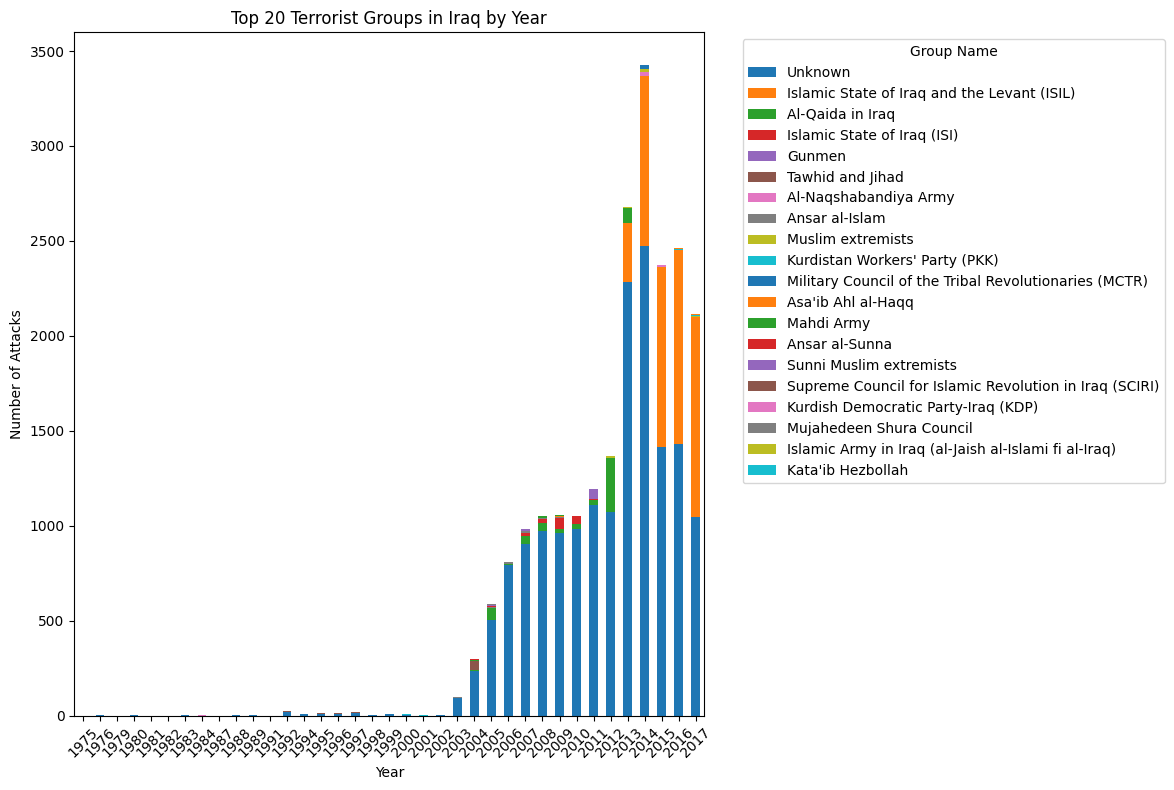

In [62]:
# Filter the data for Iraq
iraq_data = df[df['Country'] == 'Iraq']

# Group the data by year, group name, and count the occurrences
grouped_data = iraq_data.groupby(['Year', 'Group name']).size().unstack(fill_value=0)

# Get the top 20 groups based on total attacks over all years
top_20_groups = iraq_data['Group name'].value_counts().nlargest(20).index

# Filter the grouped data for only the top 20 groups
grouped_data_top_20 = grouped_data[top_20_groups]

# Plotting the data
grouped_data_top_20.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 20 Terrorist Groups in Iraq by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Group Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Iraq has been embroiled in numerous conflicts and instability for decades, with a complex web of political, sectarian, and ethnic tensions contributing to its tumultuous history. The country faced prolonged dictatorship under Saddam Hussein, marked by internal repression and external aggression, including the Iran-Iraq War and the Gulf War. The US-led invasion of Iraq in 2003 further destabilized the region, leading to the ousting of Saddam Hussein but also sparking widespread insurgency and sectarian violence. Subsequent years saw the rise of extremist groups like ISIS, exacerbating the conflict and causing immense suffering for the Iraqi people. Despite efforts to stabilize the country and rebuild institutions, Iraq continues to grapple with security challenges, political turmoil, and socio-economic disparities, underscoring the enduring complexities of its post-conflict transition.








###Do the successful propagation of terrorist attacks have any correlation with specific regions?






This inquiry seeks to explore whether there are geographical patterns or regional factors that may influence the likelihood of successful terrorist attacks spreading across different areas. Further investigation is required to discern potential relationships between the success of attacks and the regions in which they occur, considering various socio-political, economic, and geographical factors that might play a role in facilitating or hindering the spread of such attacks.



<Figure size 1000x600 with 0 Axes>

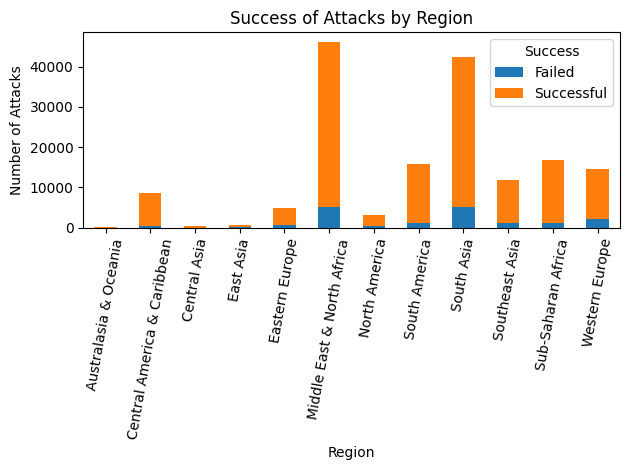

In [63]:
# Plotting the data
plt.figure(figsize=(10, 6))
df.groupby(['Region', 'Success']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Success of Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.legend(title='Success', labels=['Failed', 'Successful'])
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


The observation that first-world countries appear less vulnerable to terrorism compared to developing or impoverished nations may be attributed to several factors. These include robust security measures, stable governance structures, and well-established law enforcement agencies. Additionally, economic prosperity and social stability in first-world countries often contribute to stronger resilience against terrorist threats.
another observation made here is that wessstern europe records more attacks than eastern europe.












<Figure size 1200x800 with 0 Axes>

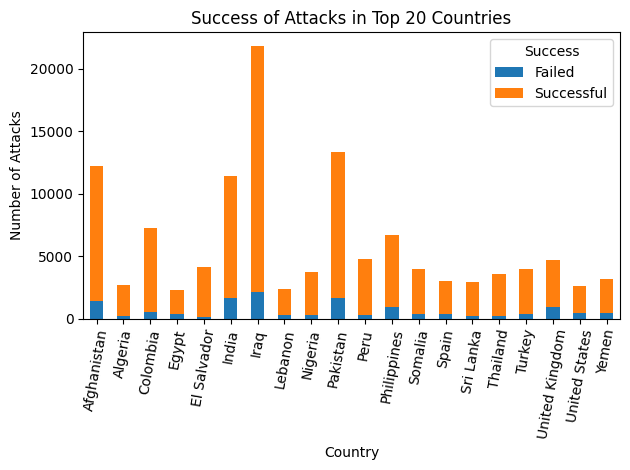

In [64]:
# Get the top 20 countries based on the number of attacks
top_20_countries = df['Country'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 countries
filtered_df = df[df['Country'].isin(top_20_countries)]

# Group the filtered data by 'Country' and 'Success', count occurrences, and unstack
grouped_data = filtered_df.groupby(['Country', 'Success']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Success of Attacks in Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.legend(title='Success', labels=['Failed', 'Successful'])
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


Developing or third-world countries dominate the list of successful attacks, indicating a higher incidence of successful terrorist incidents in these regions. This phenomenon may stem from a variety of socio-economic, political, and security-related factors prevalent in these countries. These factors might include weaker law enforcement capabilities, limited access to resources for counterterrorism efforts, social instability, and ongoing conflicts. Additionally, vulnerabilities such as porous borders, economic disparities, and political instability can exacerbate the risk of successful terrorist attacks in these regions.

However, it's essential to consider that terrorism can manifest differently across regions, influenced by various socio-economic, political, and historical contexts. Therefore, while heightened security and stable governance may mitigate terrorist risks in certain regions, addressing the root causes of terrorism remains crucial for achieving lasting peace and security globally.














###How has the global distribution of terrorist attacks evolved over time? Is the world moving towards a more favorable trajectory, or has the situation deteriorated?








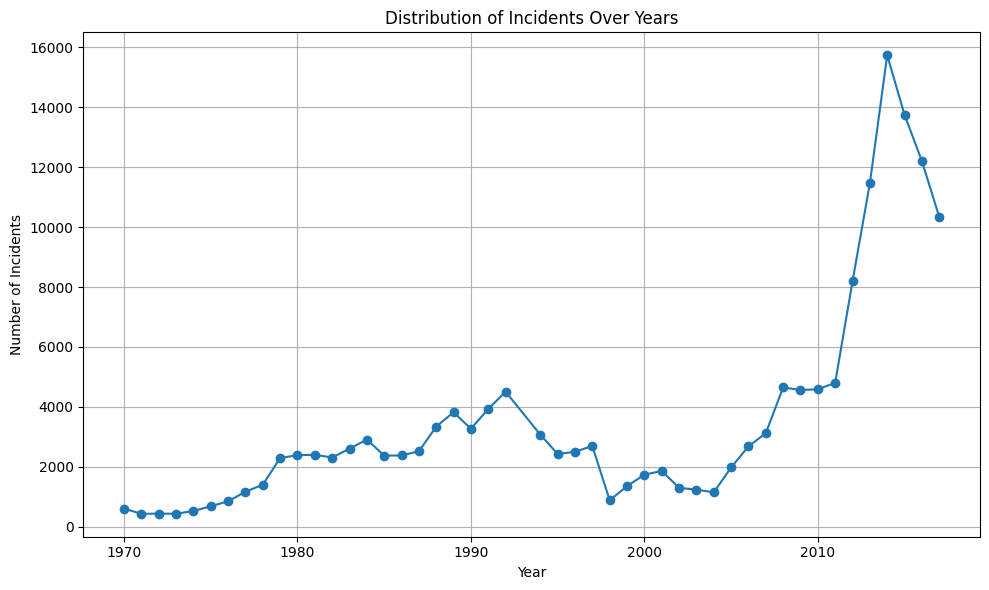

In [65]:
# Plotting the distribution of 'year'
plt.figure(figsize=(10, 6))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Distribution of Incidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


There was a significant increase in terrorism after 2010.this might be due to a number of reasons like the emrgence of ISIS,fertile ground for terrorist groups to thrive the spillover effects of conflicts in the middle east contributed to the spread of terrorism beyond the region, affecting countries worldwide.

Terrorist groups became increasingly sophisticated in their tactics, leveraging social media and technology to recruit members, radicalize individuals, and coordinate attacks. This enabled them to carry out more frequent and deadly attacks with greater ease.

Individuals or small groups, often inspired by extremist ideologies,started  carrying out attacks independently without direct support from established terrorist organizations.

As the dataset only encompasses records up to the year 2017, it is notable that the frequency of terrorist attacks appears to have notably decreased in recent years.





This observed reduction in the number of terrorist attacks suggests potential shifts in geopolitical dynamics, changes in counterterrorism strategies, or alterations in the operational capabilities of terrorist groups. Moreover, it underscores the importance of ongoing efforts to mitigate the threat of terrorism and promote global security and stability.








###What are the key findings derived from this analysis? Do these findings offer actionable insights to address the challanges in real life situations? In summary, what conclusions can be drawn from the analysis?








When we finish examine the dataset we find some of our preconcieved notions to be right and some wrong.This realization emphasizes the importance of relying on empirical evidence and data-driven analysis to inform our understanding of complex phenomena such as terrorism. Additionally, it underscores the need for critical thinking and openness to revising our perspectives based on factual evidence rather than assumptions or biases.

**Terrorist groups and their emergence**- terrorist groups have emerged in the aftermath of wars, conflicts, or periods of political instability. While there can be various factors contributing to the rise of terrorism, conflicts often create conditions conducive to the growth of extremist ideologies and militant organizations. Political Instability,Socio-Economic Disparities,Ethnic and Religious Tensions,Foreign Interventions are some of the commom factors in birthing terrorist groups.

**Navigating the Turbulence: Terrorism's Grip on the Middle East, North Africa, and South Asia**-These regions have been ravaged by some of the most violent conflicts and wars, with some countries experiencing seemingly endless cycles of instability. While certain areas, such as India, have shown notable progress, others, like Somalia, have faced worsening conditions compared to previous years.

**Iraq,better days are coming**-Iraq has witnessed periods of significant progress and improvement in certain aspects since emerging from the grip of terrorist regimes. However, the country continues to face numerous challenges, including political instability, sectarian tensions, economic hardships, and ongoing security threats. While strides have been made in rebuilding infrastructure, restoring governance, and combating terrorism, the road to stability and prosperity remains fraught with obstacles. Therefore, while there have been moments of hope and advancement, Iraq's journey toward a better future remains complex and multifaceted.

**First world problems**-The observation that first-world countries record the lowest to no terrorist attacks confirms the significant influence of a nation's economic and social conditions on its susceptibility to such threats.

**Quiet Central asia**- central asian countries like Kazakhstan, Uzbekistan, Turkmenistan, Tajikistan, and Kyrgyzstan are much safer than most countries ,from terrorist attacks.strong authoritarian governments, geographical isolation, and ethnic and religious homogeneity contribute to the region's relative safety.


**weapon in hand**-terrorists mostly resort to bombing or exploding their target.this might be  due to the fact that bombing would be a bigger intimidation tactic than armed assault or hostage taking.also the degree of the type of attack inflicted also depend on the region.this might be influenced by the weapon and resource availability that differs in different region.

**Shadow attack**-the number of unknown perpetrators is staggering though not surprising.same goes for the number of  unknown location that fell vicitm to a terror attack. as it was mentioned earlier this might be attributed to the fact that conflict afflicted region would see more locations and perpetrators in the unknown category as it is hard to keep up with attacks.the time of a conflict would witness multiple attacks and attackers that are not known.



**Changing Dynamics**- The patterns of terrorism have evolved over time, influenced by factors such as geopolitical shifts, socio-economic conditions, and advancements in technology. Understanding these dynamics is essential for developing effective counterterrorism strategies.

**Root Causes**- Addressing the root causes of terrorism, including poverty, political grievances, social marginalization, and ideological extremism, is crucial for preventing radicalization and reducing the risk of future attacks.

**Foreign hands** - Wealthier nations, especially those in the first world, meddling in the internal affairs of poorer countries has often worsened existing problems, as seen in the case of Iraq and other struggling nations.

**Learning from mistakes**-there are countries previously plagued by terrorism have made significant strides in overcoming it.






Colombia: After decades of conflict with guerrilla groups such as the Revolutionary Armed Forces of Colombia (FARC), Colombia has made remarkable progress in recent years towards peace and stability. The Colombian government engaged in peace negotiations with FARC, resulting in a historic peace agreement in 2016. Since then, the country has experienced a significant reduction in violence and terrorist incidents, allowing for greater economic development and social cohesion.

Sri Lanka: Sri Lanka faced a prolonged civil war with the Liberation Tigers of Tamil Eelam (LTTE) for nearly three decades. However, following the defeat of the LTTE in 2009, the country has made significant efforts towards reconciliation, rehabilitation, and reconstruction. Although sporadic incidents occur, Sri Lanka has largely emerged from the shadow of terrorism and is experiencing a period of relative peace and stability.

Northern Ireland: Northern Ireland endured decades of sectarian violence and terrorism during the Troubles, a period of conflict between nationalist and unionist communities. However, through the Good Friday Agreement in 1998 and subsequent peace-building efforts, Northern Ireland has made substantial progress in achieving peace and reconciliation. While challenges remain, the region has seen a significant reduction in terrorist incidents and is moving towards a more peaceful future.

These examples demonstrate that with political will, effective governance, and sustained efforts towards peace-building and reconciliation, countries can successfully overcome the scourge of terrorism and move towards a brighter future.



**Long way to go**-Some countries continue to struggle with persistent terrorism and have not yet made significant progress in overcoming it.

Afghanistan: Despite efforts to combat terrorism, Afghanistan remains one of the most heavily affected countries, grappling with a resilient insurgency led by groups such as the Taliban and ISIS-Khorasan Province (ISIS-K). The security situation remains precarious, with frequent terrorist attacks targeting civilians, security forces, and government institutions.

Syria: The ongoing civil war in Syria has created a fertile ground for terrorism, with various extremist groups, including ISIS and Hayat Tahrir al-Sham (HTS), exploiting the conflict to advance their agendas. The country continues to experience widespread violence, displacement, and humanitarian crises as a result of terrorist activities and broader conflict dynamics.

Somalia: Somalia has long been plagued by terrorism, particularly by the militant group al-Shabaab. Despite efforts by the Somali government and international partners to combat the insurgency, al-Shabaab remains active and continues to carry out deadly attacks, exacerbating instability and hindering development efforts in the country.

Nigeria: Nigeria faces significant challenges from terrorism, particularly from the jihadist group Boko Haram and its offshoot, Islamic State West Africa Province (ISWAP). The insurgency in northeastern Nigeria has resulted in widespread violence, displacement, and humanitarian crises, with attacks targeting civilians, security forces, and infrastructure.

Yemen: The ongoing conflict in Yemen has created a fertile ground for terrorism, with groups like al-Qaeda in the Arabian Peninsula (AQAP) and ISIS exploiting the chaos to expand their presence and carry out attacks. The conflict has exacerbated humanitarian crises, including food insecurity and displacement, further complicating efforts to address terrorism in the country.




**Counterterrorism Measures**- Implementing comprehensive counterterrorism measures is essential for mitigating the threat of terrorism and enhancing global security. These measures may include:

Strengthening intelligence and information-sharing mechanisms to identify and disrupt terrorist networks.

Enhancing border security and international cooperation to prevent the movement of terrorists and illicit goods.

Investing in community engagement and deradicalization programs to address underlying grievances and promote social cohesion.

Employing targeted military interventions and law enforcement operations to dismantle terrorist infrastructure and apprehend perpetrators.

Supporting development initiatives and good governance to address socio-economic inequalities and build resilient societies.

In conclusion, the analysis of the global terrorism dataset underscores the complex and multifaceted nature of terrorism as a global challenge. From the stark regional variances in terrorist activity to the evolving dynamics of terrorist tactics and the enduring struggle of affected countries, it is evident that terrorism continues to pose significant threats to peace, security, and development worldwide. However, amidst these challenges, there is also room for hope and progress. Countries such as Colombia, Sri Lanka, and Northern Ireland have demonstrated that with political will, effective governance, and sustained efforts towards peace-building and reconciliation, it is possible to overcome the scourge of terrorism and pave the way for a more peaceful future. Moving forward, it is imperative for governments, civil society organizations, and the international community to remain vigilant, collaborative, and committed to addressing the root causes of terrorism, promoting social cohesion, and building resilient societies. Only through collective action and unwavering determination can we hope to achieve lasting peace and security for all.





































